<a href="https://colab.research.google.com/github/gimenopea/CSCI6364/blob/main/GD%2C%20ID3%2C%20SVM%20-%20Project%202/CSCI6364_Project_2_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project 2**- Task 1 Linear Regression (15pts):

In this exercise, you will implement a linear regression model to predict the house price. For this
exercises use the dataset from the link below. Only use a single feature for you regression model and
explain your reasons for selecting that feature. Please explain the data setting and experimental setup
similar to Project 1.
The key components of your linear regression model are the cost function and gradient decent method
to update the weights.

https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression/data


# 1. Task Setup and sample splitting

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/DATA_STORE/kc_house_data.csv')


In [ ]:
df_norm = (df - df.mean()) / df.std()

In [ ]:
train, test = train_test_split(df_norm, test_size=0.2, random_state=69)

train, val = train_test_split(train, test_size=0.2, random_state=69)

#check the shape of the data
print(train.shape)
print(val.shape)
print(test.shape)

(13832, 21)
(3458, 21)
(4323, 21)


# 2. Feature selection

One feature will be selected based on the highest correlation among the variables to the target which is price.

In [ ]:
#calculate and sort highest correlation wrt price
corr = train.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.696098
grade            0.663449
sqft_above       0.599814
sqft_living15    0.587558
bathrooms        0.512786
view             0.384801
bedrooms         0.321161
lat              0.318558
sqft_basement    0.311594
floors           0.268417
waterfront       0.254408
yr_renovated     0.115188
sqft_lot         0.085132
sqft_lot15       0.078625
yr_built         0.051809
condition        0.032224
long             0.020111
id              -0.014780
zipcode         -0.047377
Name: price, dtype: float64

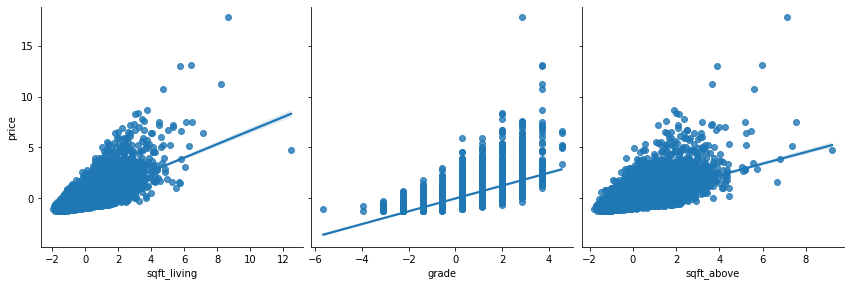

In [ ]:
#for this task, i am selecting sqft_living as my primary feature
#pairplot of sqft_living, grade, sqft_above and price

sns.pairplot(train, x_vars=['sqft_living', 'grade', 'sqft_above'], y_vars='price', height=4, aspect=1, kind='reg')



#3. Implementing Gradient Descent 



task: minimize the cost function on each pass:

\begin{align} \mathbf{J_{cost}} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y} )^2.
\end{align}

---


to minimize the cost, weights will need to be updated by finding the gradient with respect to m and b.



In [ ]:
X = train['sqft_living']
y = train['price']

#convert to numpy array
X = np.array(X)
y = np.array(y)

In [ ]:
m = 0
c = 0
learning_rate = .01
n_iter = 5000
#mean squared error if y is a vector
def error_calc(X,y,m,c):
    error = 0
    n = len(X)
    for i in range(n):
        y_hat = m*X[i] + c
        error += (y_hat - y[i])**2
    return error/n
    

def calculate_gradient(X,y,m,c):
    n = len(X)
    c_grad = 0
    m_grad = 0
    for i in range(n):
        y_hat = m*X[i] + c
        c_grad += -2*(y[i] - y_hat)
        m_grad += -2*X[i]*(y[i] - y_hat)
    return c_grad/n, m_grad/n

#gradient descent
def gradient_descent(X, y, m, c, learning_rate, n_iter):
    
    errors = []
    
    
 
    for i in range(n_iter):  

        #calculate total error
        error = error_calc(X,y,m,c)
        if i % 100 == 0:
          print(f'on iter: {i} m:{m} c: {c} error {error}')
          errors.append(error)

        c_grad, m_grad = calculate_gradient(X,y,m,c)
        
        #update m and c
           
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad 
                         
    return m,c,errors



In [ ]:
m, c, errors = gradient_descent(X, y, m, c, learning_rate, n_iter)

on iter: 0 m:0 c: 0 error 0.8859723280450877
on iter: 100 m:0.5717517862877473 c: -0.0097373580626163 error 0.4652078947990888
on iter: 200 m:0.6528726271773571 c: -0.009940936731296663 error 0.45674097853803924
on iter: 300 m:0.6643843924412159 c: -0.009813583704232675 error 0.4565704648051399
on iter: 400 m:0.6660183111079834 c: -0.009774788334663484 error 0.45656702845648245
on iter: 500 m:0.6662502602482104 c: -0.009766533840132048 error 0.45656695916178847
on iter: 600 m:0.6662831926980016 c: -0.009764997680627356 error 0.4565669577637074
on iter: 700 m:0.6662878691843008 c: -0.009764731273170494 error 0.4565669577354861
on iter: 800 m:0.6662885333483373 c: -0.009764687040620609 error 0.4565669577349177
on iter: 900 m:0.6662886276864279 c: -0.00976467991019783 error 0.45656695773490447
on iter: 1000 m:0.6662886410878559 c: -0.00976467878496869 error 0.45656695773490436
on iter: 1100 m:0.6662886429918422 c: -0.009764678610226955 error 0.45656695773490363
on iter: 1200 m:0.666288643

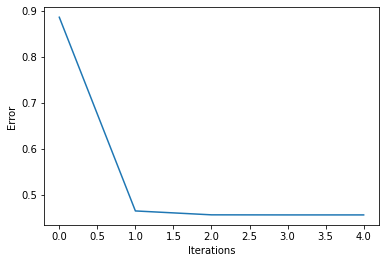

In [ ]:
#plot the errors
import matplotlib.pyplot as plt
plt.plot(errors[:5])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

### 4. Parameter tuning on learning rate, iter, and batch size


In [ ]:
#train on validation set
X_val = val['sqft_living']
y_val = val['price']

#convert to numpy array
X_val = np.array(X_val)
y_val = np.array(y_val)

#calculate error on validation set
error_val = error_calc(X_val,y_val,m,c)

print(f'error on validation set: {error_val}')

error on validation set: 0.5886410067999407


In [ ]:
def mini_batch_gradient_descent(X, y, m, c, learning_rate, n_iter, batch_size):

    errors = []
    
    n = len(X)
    
    for i in range(n_iter):  

        #calculate total error
        error = error_calc(X,y,m,c)
        if i % 300 == 0:
          print(f'on iter: {i} m:{m} c: {c} error {error}')
          errors.append(error)

        #calculate the batch size
        batch_size = int(n/batch_size)      
        shuffled = np.random.permutation(n) 

        #loop through mini batch
        for i in range(0, n, batch_size):
            X_batch = X[shuffled[i:i+batch_size]]
            y_batch = y[shuffled[i:i+batch_size]]
            
            c_grad, m_grad = calculate_gradient(X_batch,y_batch,m,c)
        
            #update m and c
           
            m = m - learning_rate * m_grad
            c = c - learning_rate * c_grad 

    return m,c,errors 

In [ ]:
m = 0
c = 0
learning_rate = .001
n_iter = 5000
batch_size = 100
m, c, errors = mini_batch_gradient_descent(X, y, m, c, learning_rate, n_iter, batch_size)

on iter: 0 m:0 c: 0 error 0.8859723280450877
on iter: 300 m:0.6661616490540442 c: -0.009820327782986846 error 0.4565669763284889
on iter: 600 m:0.6652382612025579 c: -0.010195809910280107 error 0.45656820417500815
on iter: 900 m:0.6672251313111631 c: -0.009573387817406317 error 0.456567839823961
on iter: 1200 m:0.6684237807540697 c: -0.008877963835020297 error 0.4565721259229629
on iter: 1500 m:0.6671128250325946 c: -0.009298395484528274 error 0.4565678266843223
on iter: 1800 m:0.6659387790401518 c: -0.010486550138334858 error 0.4565675937466653
on iter: 2100 m:0.66603984051827 c: -0.010010347370106634 error 0.4565670771075355
on iter: 2400 m:0.6647501435823665 c: -0.009938016155627158 error 0.4565692726588319
on iter: 2700 m:0.6654124657032779 c: -0.009886614005474309 error 0.45656771338503843
on iter: 3000 m:0.665764994630479 c: -0.009607449711065582 error 0.4565672486915925
on iter: 3300 m:0.666464363642439 c: -0.009799515295859708 error 0.4565669888855997
on iter: 3600 m:0.66723951

In [ ]:
X_val = val['sqft_living']
y_val = val['price']

#convert to numpy array
X_val = np.array(X_val)
y_val = np.array(y_val)

#calculate error on validation set
error_val = error_calc(X_val,y_val,m,c)
print(error_val)

0.5886072792691415


In [ ]:
#final evaluation on test set

X_test = test['sqft_living']
y_test = test['price']

#convert to numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)
error_val = error_calc(X_test,y_test,m,c)
print(error_val)

0.6105094345555423


In [ ]:
df[['sqft_living','price']].sort_values('sqft_living')[:10]

,sqft_living,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0
21332,390,245000.0
8623,410,325000.0
11500,420,229050.0
14466,420,280000.0
465,430,80000.0


In [ ]:
#sanity check
m*380 + c

253.22853589190441